# Intro

Примеры к книге "Глубокое обучение. Погружение в мир нейронных сетей" (Николенко, Кадурин, Архангельская).  
В книге старая версия tf 1, потому примеры переписаны на keras (tf 2).

In [ ]:
%load_ext tensorboard

In [11]:
import datetime

import numpy as np  
import matplotlib.pyplot as plt

import tensorflow as tf
import keras.backend as K
from keras.layers import Input, Dense, Flatten, Reshape, Dropout
from keras.models import Model 
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Lambda
from keras.regularizers import L1L2

from visualization.plot_graph import plot_digits, plot_digits_page
from data.get_data import get_mnist

11490434/11490434 [==============================] - 26s 2us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


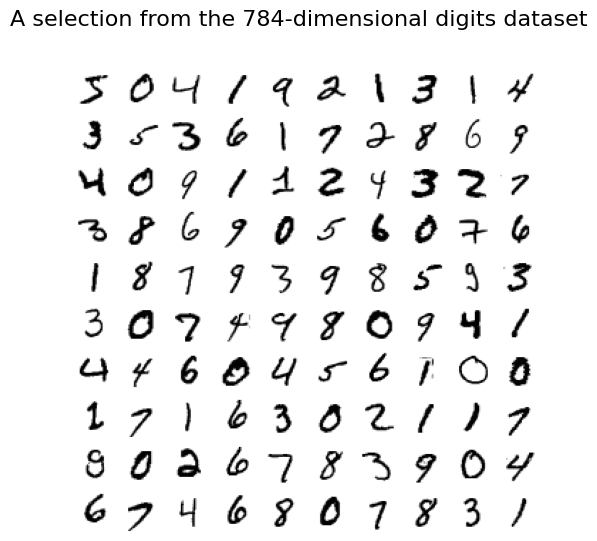

In [3]:
# Load MNIST
x_train, y_train, x_test, y_test = get_mnist()

for i in [x_train, y_train, x_test, y_test]:
    print (i.shape)

plot_digits_page(x_train)

# Простой пример (по сути логистическая регрессия)

In [7]:
# Входной плейсхолдер
# 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
input_img = Input(shape=(28, 28, 1)) 
# Решейпинг
flat_img = Flatten()(input_img)
# Выход (softmax)
output = Dense(10, activation='softmax')(flat_img)


# Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои  
# Другие модели можно так же использовать как и слои
simple_model = Model(input_img, output, name = "simple_model")

# Компилируем (построение графа вычислений)
simple_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Посмотрим на число параметров
simple_model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# For tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

simple_model.fit(x_train, y_train,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback]
                )

Epoch 1/50
600/600 [==============================] - 6s 7ms/step - loss: 1.1656 - accuracy: 0.7323 - val_loss: 0.7306 - val_accuracy: 0.8427
Epoch 2/50
600/600 [==============================] - 4s 6ms/step - loss: 0.6523 - accuracy: 0.8506 - val_loss: 0.5584 - val_accuracy: 0.8677
Epoch 3/50
600/600 [==============================] - 4s 7ms/step - loss: 0.5429 - accuracy: 0.8657 - val_loss: 0.4887 - val_accuracy: 0.8785
Epoch 4/50
600/600 [==============================] - 4s 6ms/step - loss: 0.4902 - accuracy: 0.8742 - val_loss: 0.4494 - val_accuracy: 0.8868
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.4578 - accuracy: 0.8799 - val_loss: 0.4242 - val_accuracy: 0.8916
Epoch 6/50
600/600 [==============================] - 3s 6ms/step - loss: 0.4354 - accuracy: 0.8845 - val_loss: 0.4055 - val_accuracy: 0.8955
Epoch 7/50
600/600 [==============================] - 4s 6ms/step - loss: 0.4188 - accuracy: 0.8882 - val_loss: 0.3916 - val_accuracy: 0.8976
Epoch 

# Простая сетка (с внутренним слоем)

In [12]:
# Входной плейсхолдер
# 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
input_img = Input(shape=(28, 28, 1)) 
# Решейпинг
flat_img = Flatten()(input_img)
# Внутренний слой с ReLU
hidden_layer = Dense(100, activation='relu')(flat_img)
# dropout
dropout_layer = Dropout(rate = 0.5)(hidden_layer)
# Выход (softmax)
output = Dense(10, activation='softmax')(dropout_layer)


# Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои  
# Другие модели можно так же использовать как и слои
one_hidden_level_model = Model(input_img, output, name = "simple_model")

# Компилируем (построение графа вычислений)
one_hidden_level_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Посмотрим на число параметров
one_hidden_level_model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
# For tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

one_hidden_level_model.fit(x_train, y_train,
                epochs=50,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback]
                )

Epoch 1/50
600/600 [==============================] - 5s 7ms/step - loss: 1.3093 - accuracy: 0.6028 - val_loss: 0.6410 - val_accuracy: 0.8609
Epoch 2/50
600/600 [==============================] - 3s 6ms/step - loss: 0.7241 - accuracy: 0.7884 - val_loss: 0.4618 - val_accuracy: 0.8883
Epoch 3/50
600/600 [==============================] - 4s 7ms/step - loss: 0.5936 - accuracy: 0.8279 - val_loss: 0.3940 - val_accuracy: 0.8989
Epoch 4/50
600/600 [==============================] - 4s 6ms/step - loss: 0.5244 - accuracy: 0.8470 - val_loss: 0.3544 - val_accuracy: 0.9070
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.4842 - accuracy: 0.8594 - val_loss: 0.3311 - val_accuracy: 0.9126
Epoch 6/50
600/600 [==============================] - 3s 6ms/step - loss: 0.4536 - accuracy: 0.8706 - val_loss: 0.3116 - val_accuracy: 0.9160
Epoch 7/50
600/600 [==============================] - 4s 6ms/step - loss: 0.4326 - accuracy: 0.8762 - val_loss: 0.2956 - val_accuracy: 0.9209
Epoch 

In [14]:
# еще 100 эпох
one_hidden_level_model.fit(x_train, y_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback]
                )

Epoch 1/100
600/600 [==============================] - 3s 6ms/step - loss: 0.2178 - accuracy: 0.9376 - val_loss: 0.1386 - val_accuracy: 0.9590
Epoch 2/100
600/600 [==============================] - 3s 6ms/step - loss: 0.2146 - accuracy: 0.9375 - val_loss: 0.1378 - val_accuracy: 0.9591
Epoch 3/100
600/600 [==============================] - 5s 8ms/step - loss: 0.2146 - accuracy: 0.9389 - val_loss: 0.1374 - val_accuracy: 0.9607
Epoch 4/100
600/600 [==============================] - 3s 6ms/step - loss: 0.2133 - accuracy: 0.9391 - val_loss: 0.1364 - val_accuracy: 0.9604
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.2132 - accuracy: 0.9392 - val_loss: 0.1348 - val_accuracy: 0.9611
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.2116 - accuracy: 0.9398 - val_loss: 0.1340 - val_accuracy: 0.9614
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.2086 - accuracy: 0.9396 - val_loss: 0.1326 - val_accuracy: 0.9613

Прошлую сетку запускал и с дропаутом и без. В целом - без дропаута она стала переобучаться уже примерно после 25 эпохи (результаты на трейне стали лучше валидации, а валидация стала улучшаться медленнее).
С дропаутом такой проблемы не было - переобучения не наблюдалось, результаты на валидации увеличивались.

PS: дообучение запустил с 1 эпохи, на графиках это теперь стало хуже читаться. Лучше сразу запустить на 150 эпох.